# importing section

### importing required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import GridSearchCV

### importing libraries

In [10]:
df = pd.read_csv('Covid Data.csv')

# Preprocessing

In [11]:
df.shape

(1048575, 21)

#### There is a total of 1048575 rows and 21 columns

In [12]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

#### The 21 columns are:
sex: 1 for female and 2 for male.<br><br>
age: of the patient.<br><br>
classification: covid test findings.<br><br> 
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.<br><br>
pneumonia: whether the patient already have air sacs inflammation or not.<br><br>
pregnancy: whether the patient is pregnant or not.<br><br>
diabetes: whether the patient has diabetes or not.<br><br>
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.<br><br>
asthma: whether the patient has asthma or not.<br><br>
inmsupr: whether the patient is immunosuppressed or not.<br><br>
hypertension: whether the patient has hypertension or not.<br><br>
cardiovascular: whether the patient has heart or blood vessels related disease.<br><br>
renal chronic: whether the patient has chronic renal disease or not.<br><br>
other disease: whether the patient has other disease or not.<br><br>
obesity: whether the patient is obese or not.<br><br>
tobacco: whether the patient is a tobacco user.<br><br>
usmr: Indicates whether the patient treated medical units of the first, second or third level.<br><br>
medical unit: type of institution of the National Health System that provided the care.<br><br>
intubed: whether the patient was connected to the ventilator.<br><br>
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.<br><br>
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.<br><br>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [14]:
df.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


In [15]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

#### Adding a new column DEATH from DEATH_DATE where 1 = Dead and 0 is not dead

In [16]:
df['DEATH']=df['DATE_DIED']
df['DEATH']=df['DEATH'].apply(lambda x: 0 if x =='9999-99-99' else 1)

In [17]:
df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


### Removing DEATH_DATE from dataset df

In [18]:
df.drop('DATE_DIED', axis=1, inplace=True)
df.shape

(1048575, 21)

### categorical data analysis

In [19]:
df['DEATH'].value_counts()

0    971633
1     76942
Name: DEATH, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


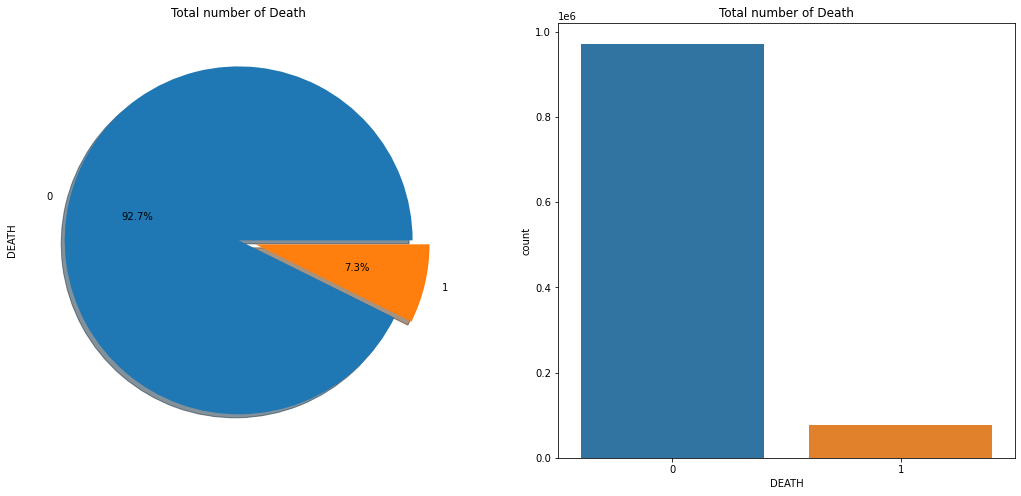

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['DEATH'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Total number of Death')
sns.countplot('DEATH', data=df, ax=ax[1])
ax[1].set_title('Total number of Death')
plt.show()

In [21]:
df.groupby(['SEX', 'DEATH'])['DEATH'].count()

SEX  DEATH
1    0        497662
     1         27402
2    0        473971
     1         49540
Name: DEATH, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


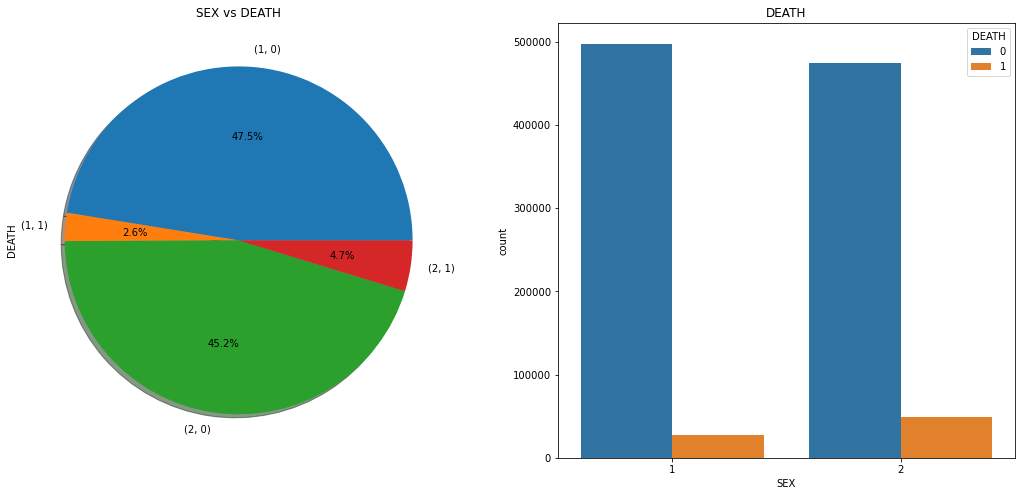

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df.groupby(['SEX', 'DEATH'])['DEATH'].count().plot.pie(
    autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('SEX vs DEATH')
sns.countplot('SEX', hue='DEATH', data=df, ax=ax[1])
ax[1].set_title('DEATH')
plt.show()

### conclusion

<ol>
<li>There rate of infection of both sexes is almost same but females have slightly more rate of infection</li>
<li>There is far greater rate of death for males(2) compared to females(1) i.e. 4.7% to 2.6%</li>

<ol>

In [23]:
for i in df.columns:
    print(df.groupby([i, 'DEATH'])['DEATH'].count())

USMER  DEATH
1      0        342517
       1         43155
2      0        629116
       1         33787
Name: DEATH, dtype: int64
MEDICAL_UNIT  DEATH
1             0           146
              1             5
2             0           164
              1             5
3             0         17683
              1          1492
4             0        274500
              1         39905
5             0          6637
              1           607
6             0         34794
              1          5790
7             0           851
              1            40
8             0          9228
              1          1171
9             0         36747
              1          1369
10            0          6405
              1          1468
11            0          5168
              1           409
12            0        578375
              1         24620
13            0           935
              1            61
Name: DEATH, dtype: int64
SEX  DEATH
1    0        497662
     1     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


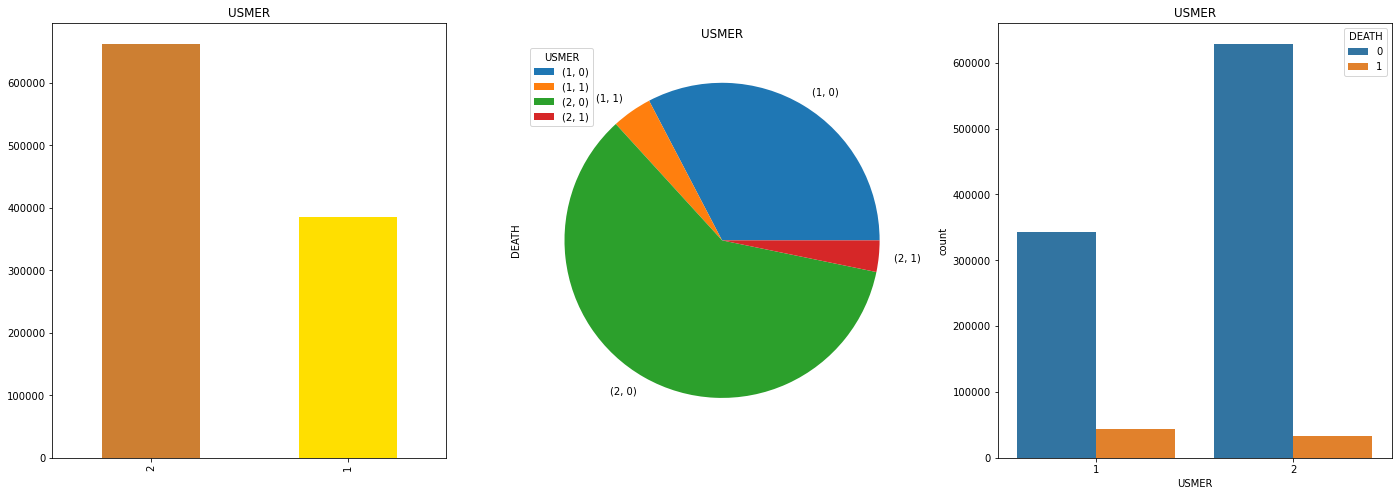

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


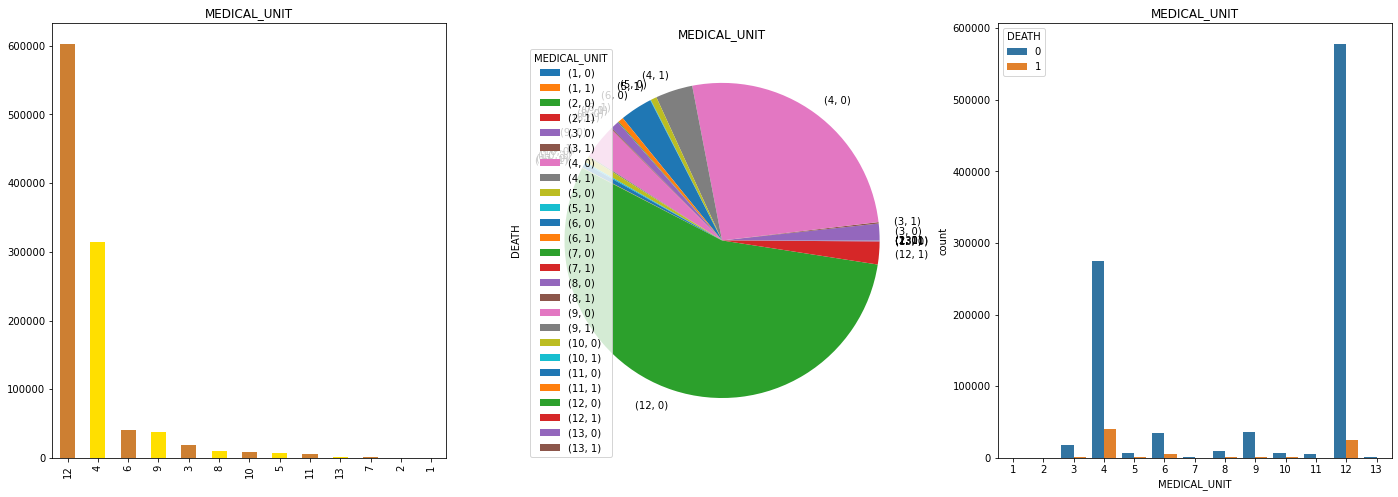

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


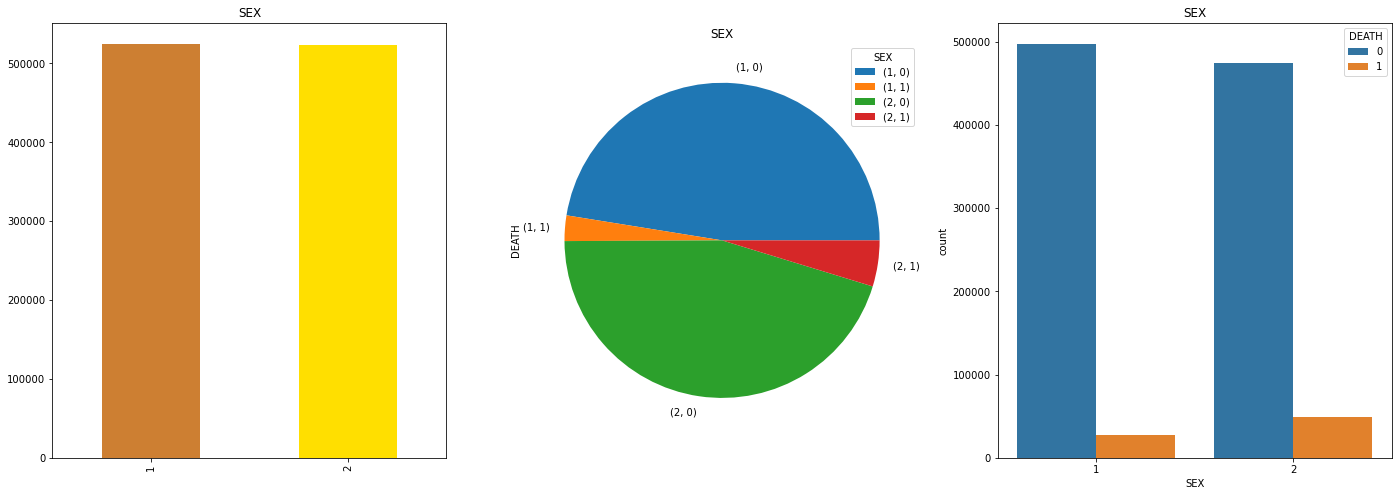

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


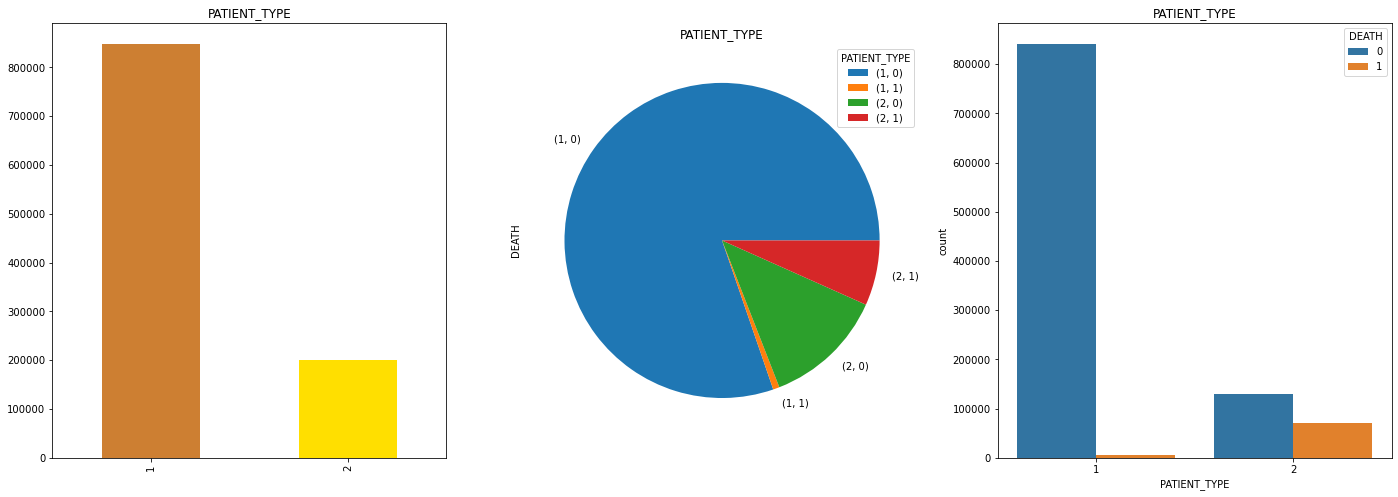

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


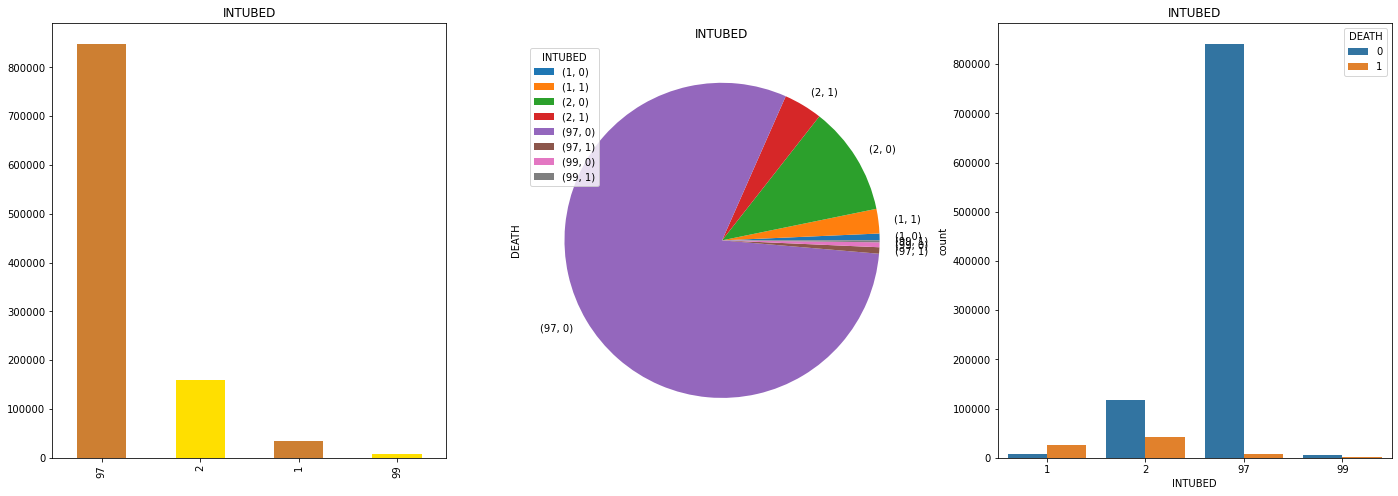

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


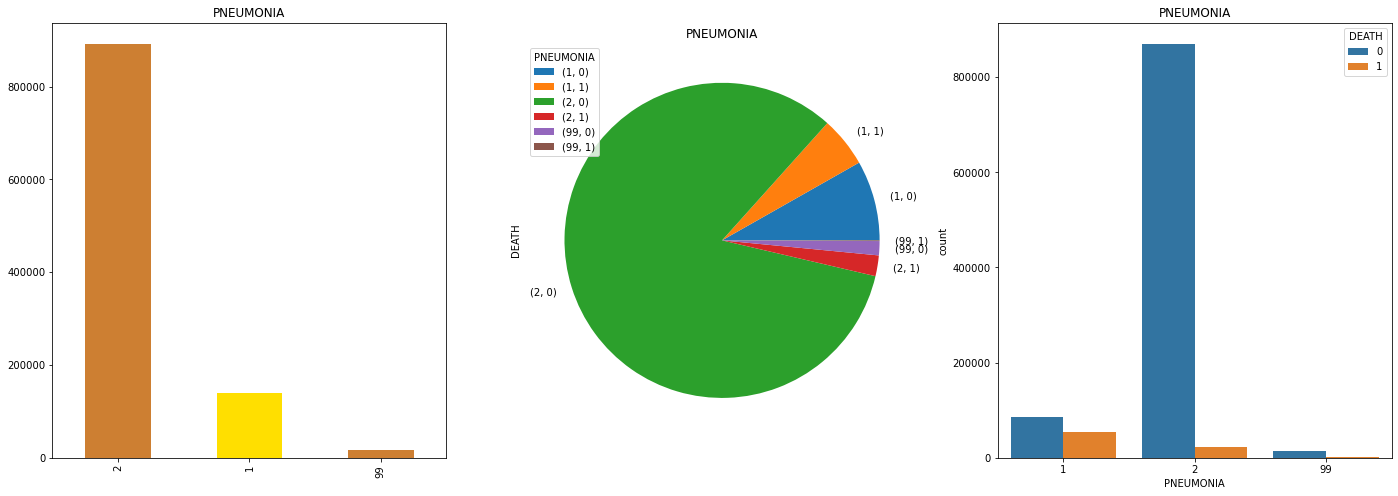

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


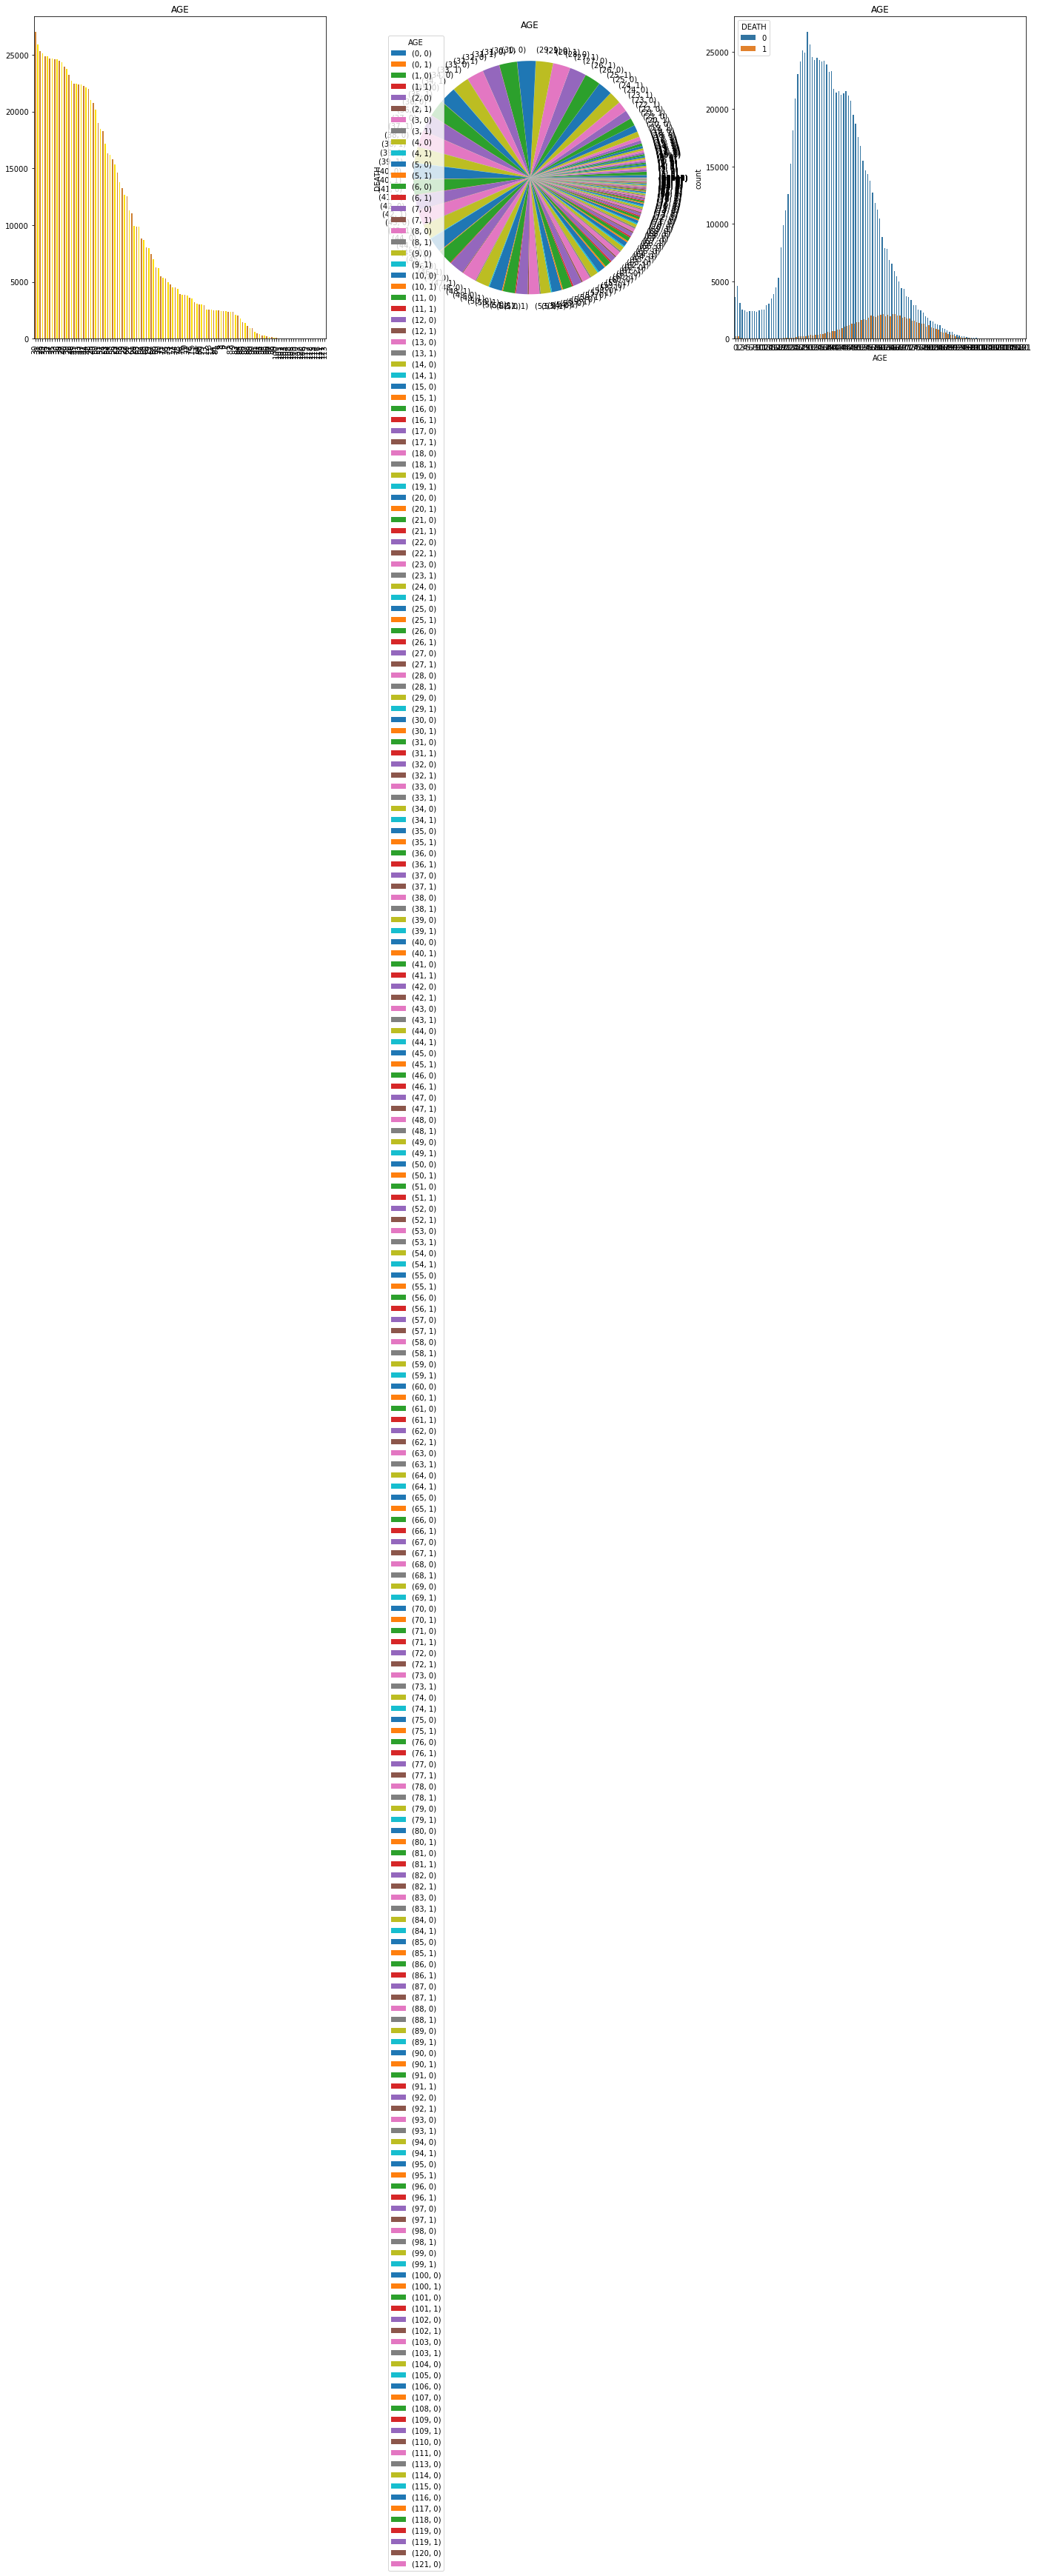

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


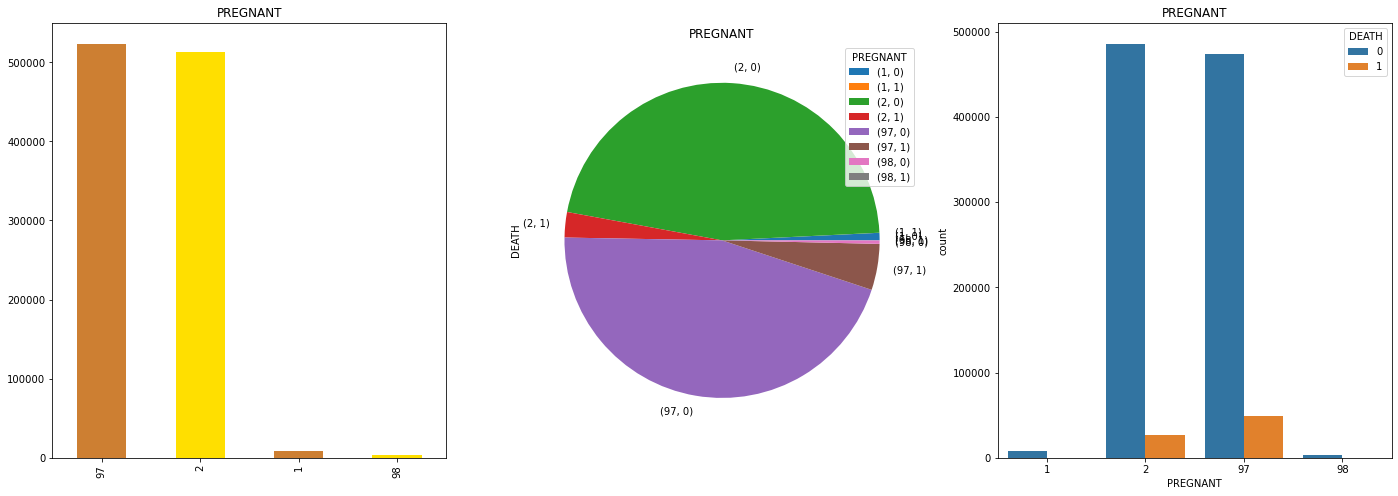

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


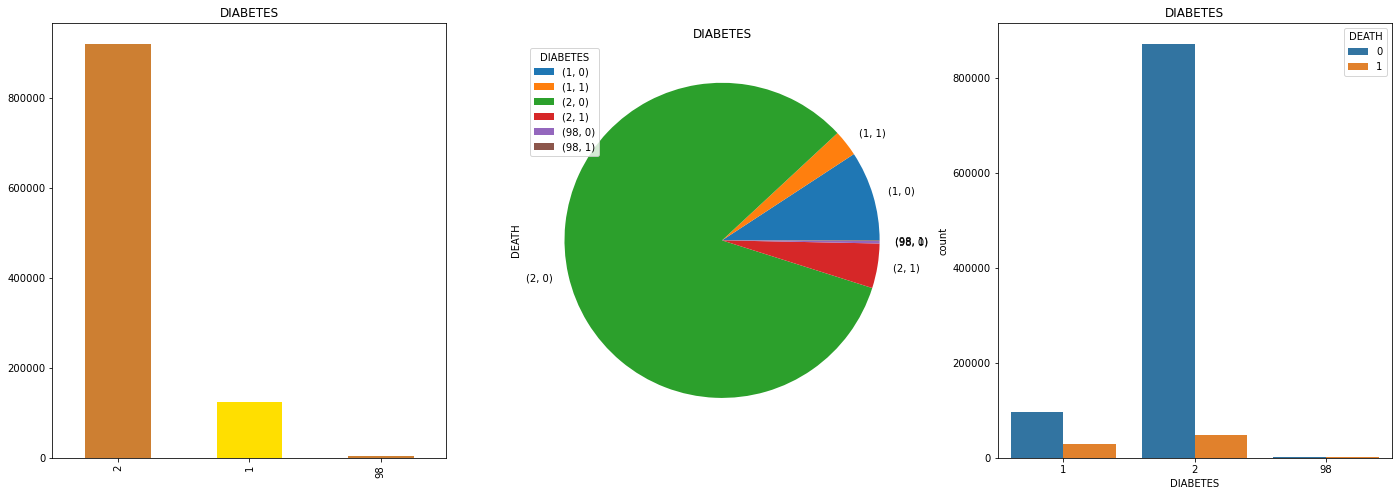

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


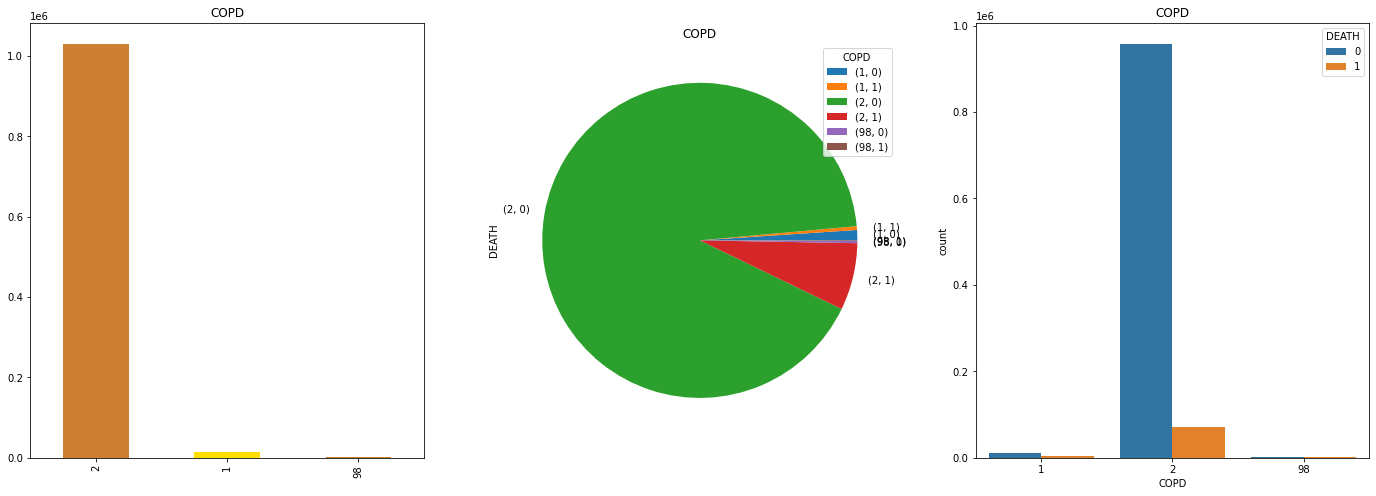

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


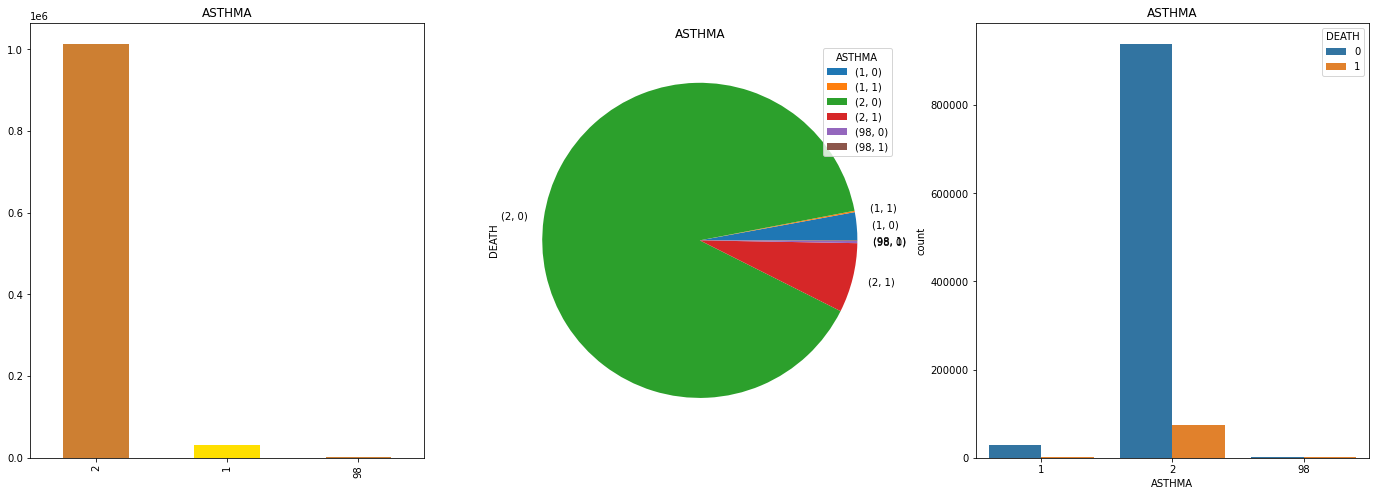

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


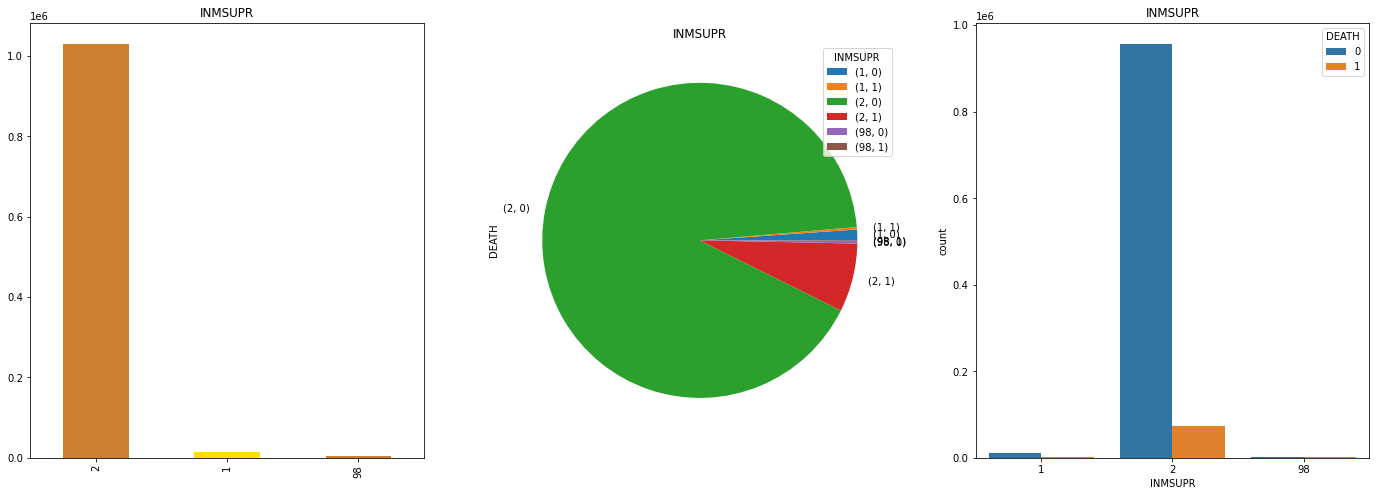

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


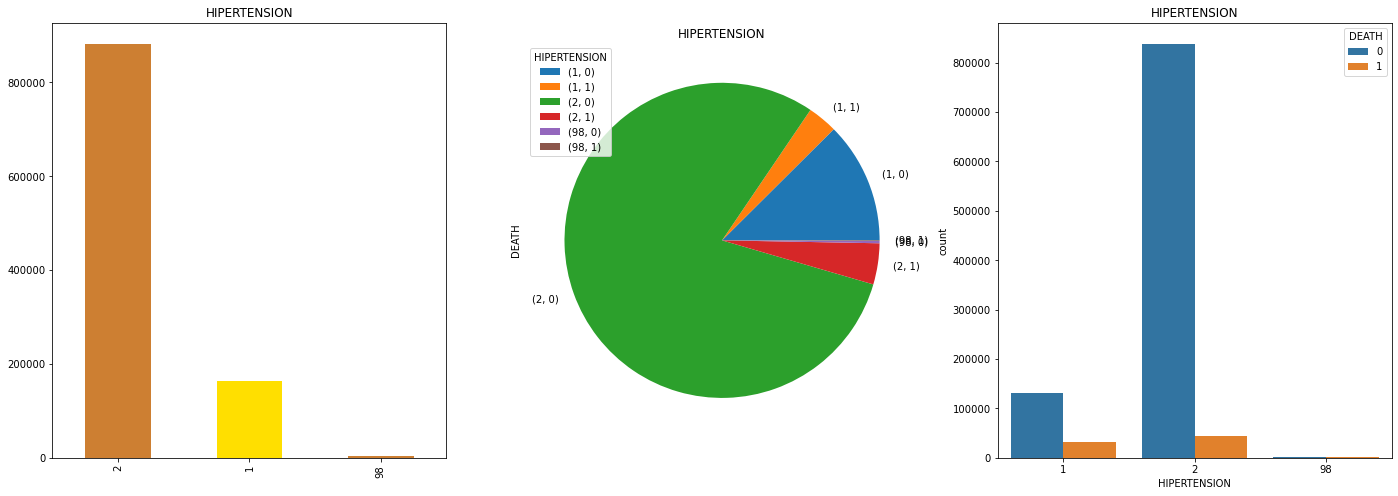

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


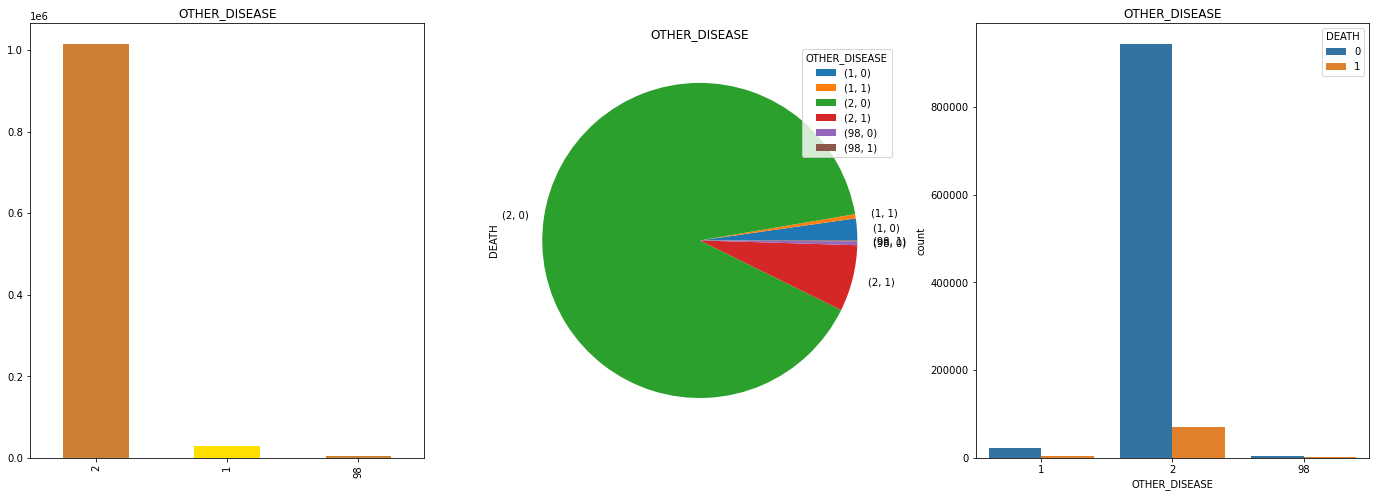

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


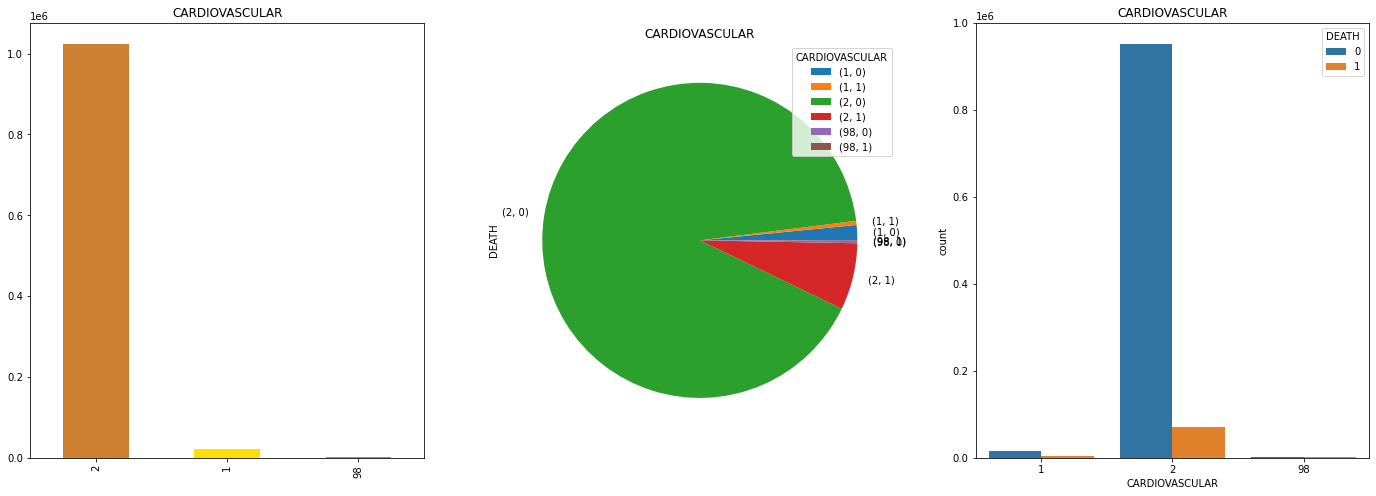

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


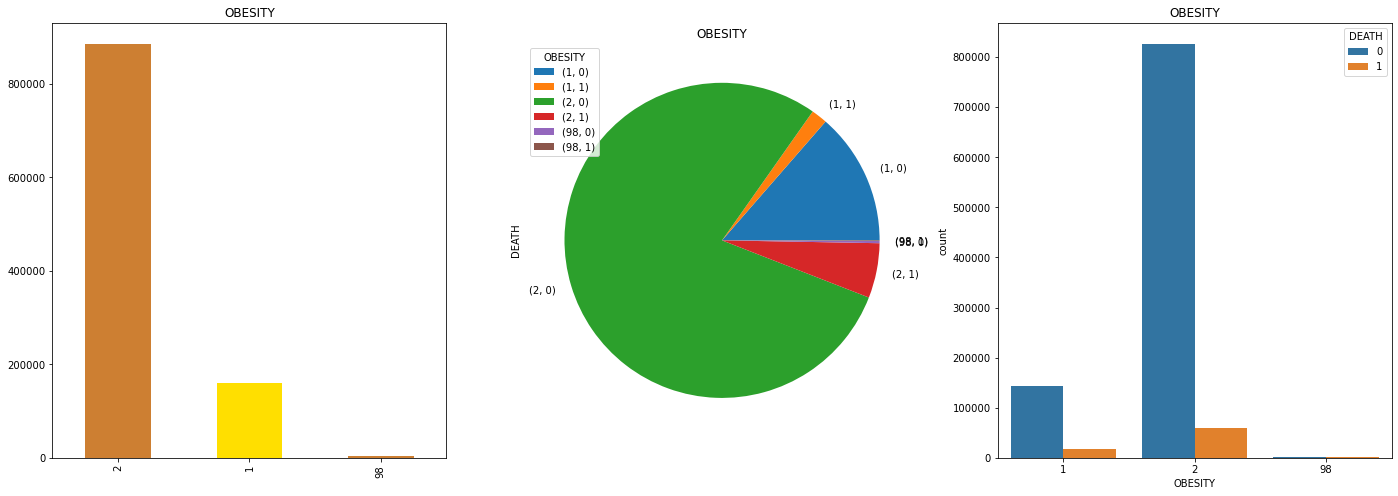

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


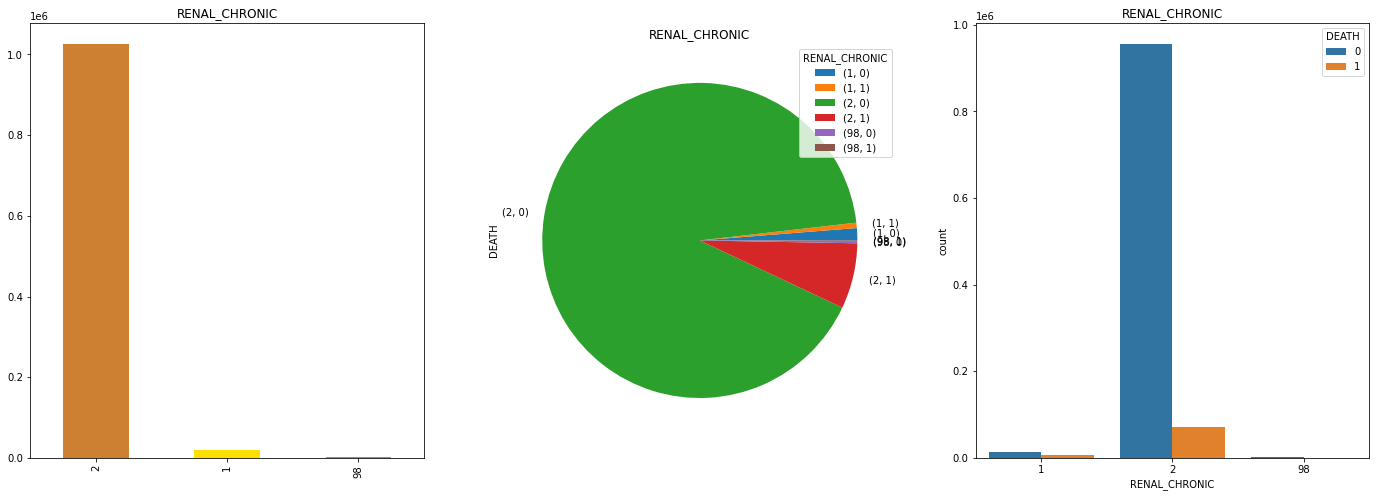

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


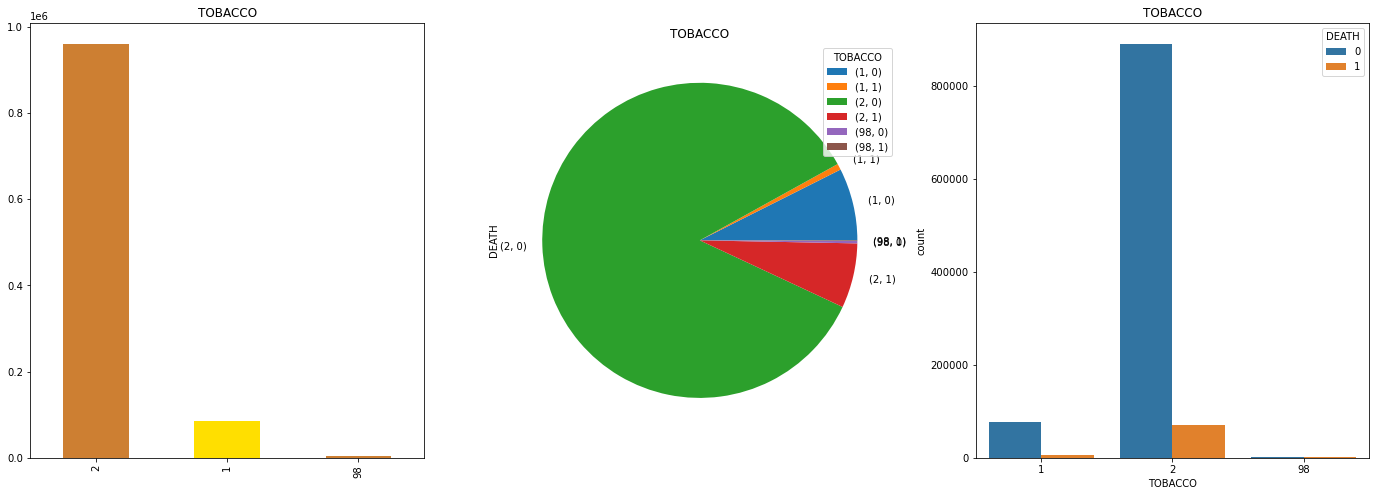

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


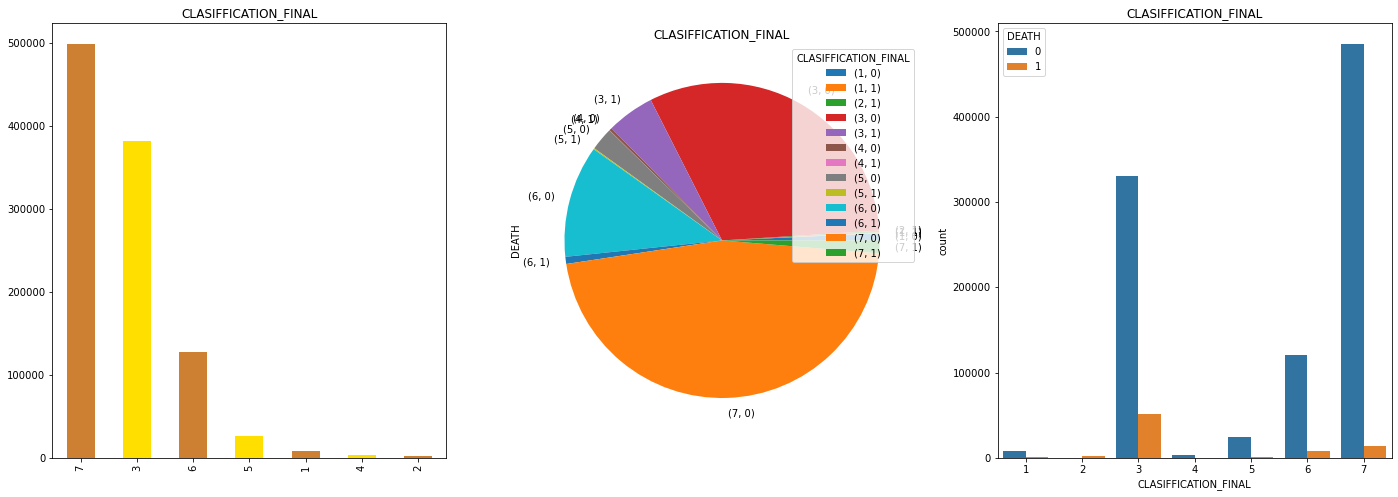

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


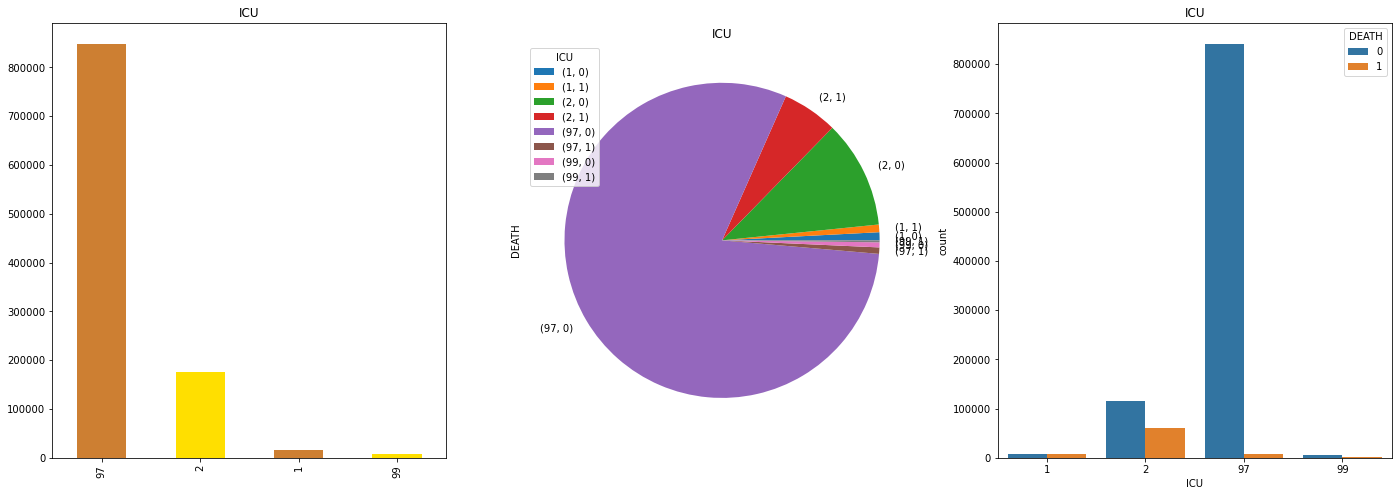

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


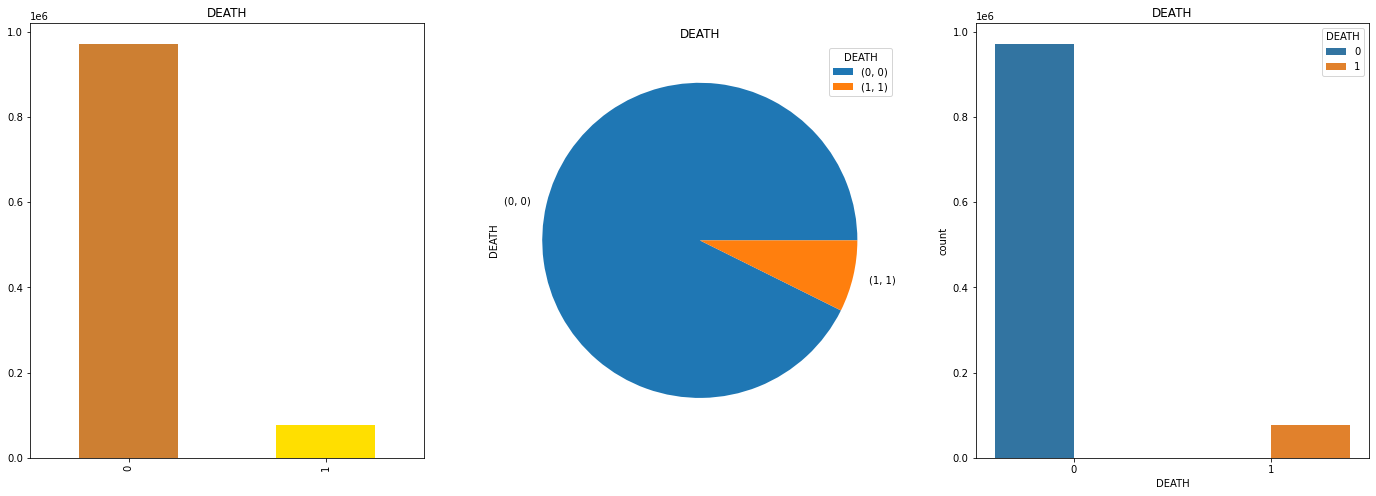

In [24]:
for i in df.columns:
   f, ax = plt.subplots(1, 3, figsize=(24, 8))
   df[i].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00'], ax=ax[0])
   ax[0].set_title(str(i))
   df.groupby([i, 'DEATH'])['DEATH'].count().plot.pie(ax=ax[1])
   ax[1].legend(title=i)
   plt.legend()
   ax[1].set_title(str(i))
   sns.countplot(i, hue='DEATH', data=df,ax=ax[2])
   ax[2].set_title(str(i))
   plt.show()

   

### Making male pregant 0

In [25]:
for i in df.columns:
    print(df[i].value_counts())

2    662903
1    385672
Name: USMER, dtype: int64
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
1    525064
2    523511
Name: SEX, dtype: int64
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64
97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
2     1030510
1       15062
98       3003
Name: COPD, dtype: int64
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
2     1031001
1       14170
9

In [26]:
df.groupby(['PATIENT_TYPE', 'INTUBED'])['INTUBED'].count()

PATIENT_TYPE  INTUBED
1             97         848544
2             1           33656
              2          159050
              99           7325
Name: INTUBED, dtype: int64

In [27]:
df['INTUBED']=np.where((df['PATIENT_TYPE']==1 & df['INTUBED'])==99,0,df['INTUBED'])
df['INTUBED']=np.where((df['INTUBED']==2),0,df['INTUBED'])
df['INTUBED']=np.where((df['INTUBED']==99),0,df['INTUBED'])


df.groupby(['PATIENT_TYPE', 'INTUBED'])['INTUBED'].count()

PATIENT_TYPE  INTUBED
1             97         848544
2             0          166375
              1           33656
Name: INTUBED, dtype: int64

### making 0 as no need for ventilator and 1 as yes to ventilator

In [28]:
df.groupby(['PNEUMONIA', 'PATIENT_TYPE','DEATH'])['DEATH'].count()


PNEUMONIA  PATIENT_TYPE  DEATH
1          1             0         19728
                         1          3467
           2             0         66387
                         1         50456
2          1             0        811087
                         1          3403
           2             0         59162
                         1         18882
99         1             0         10853
                         1             6
           2             0          4416
                         1           728
Name: DEATH, dtype: int64

In [29]:
df['PNEUMONIA']=np.where(( df['PNEUMONIA']==99),0,df['PNEUMONIA'])
df['PNEUMONIA']=np.where((df['PNEUMONIA']==2),0,df['PNEUMONIA'])

In [30]:
df['PNEUMONIA'].value_counts()

0    908537
1    140038
Name: PNEUMONIA, dtype: int64

### Making blank value in PNEUMONIA correct

### for AGE

In [31]:
print("Maximum=",df['AGE'].max())
print("Minimum=",df['AGE'].min())


Maximum= 121
Minimum= 0


In [32]:
count=0
for i in df['AGE']:
    if i > 100:
        count+=1
print(count)

138


In [33]:
df.groupby(['AGE', 'DEATH'])['AGE'].count()

AGE  DEATH
0    0        3653
     1         209
1    0        4617
     1         185
2    0        3123
              ... 
118  0           2
119  0           2
     1           1
120  0           5
121  0           1
Name: AGE, Length: 227, dtype: int64

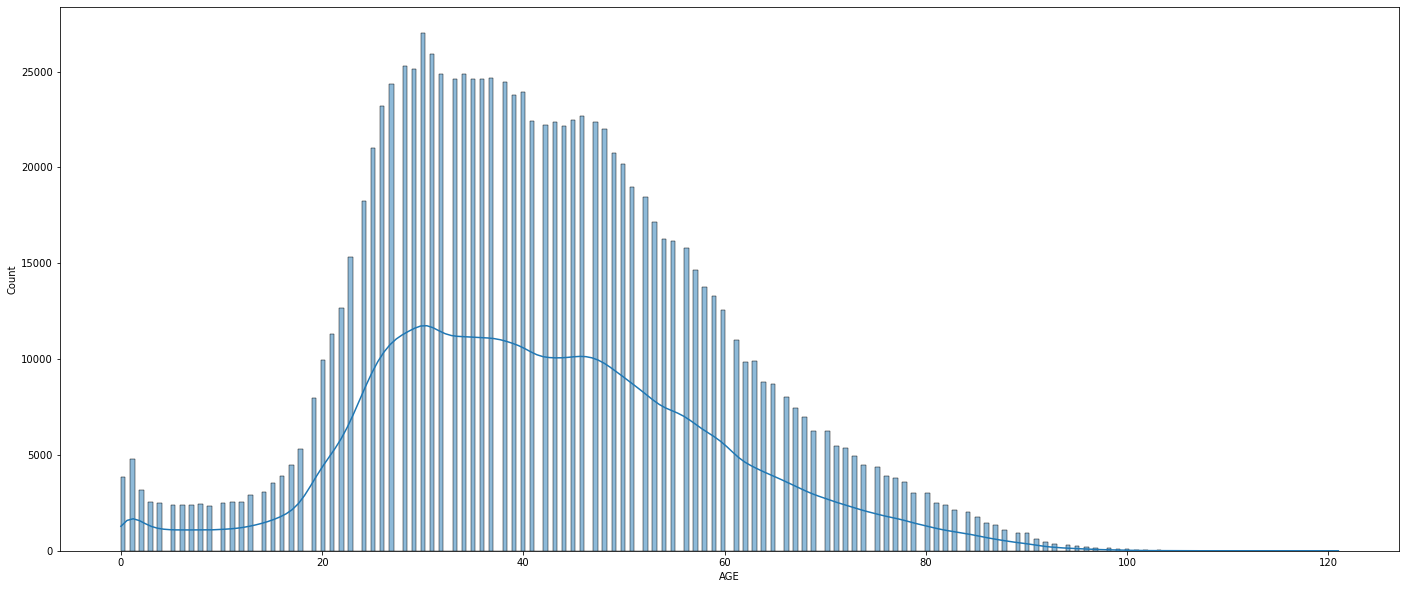

In [34]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.histplot(data=df['AGE'],ax=ax,kde=True)
#sns.histplot(data=df.groupby(['AGE', 'DEATH'])['AGE'].count(),ax=ax,kde=True)
plt.show()

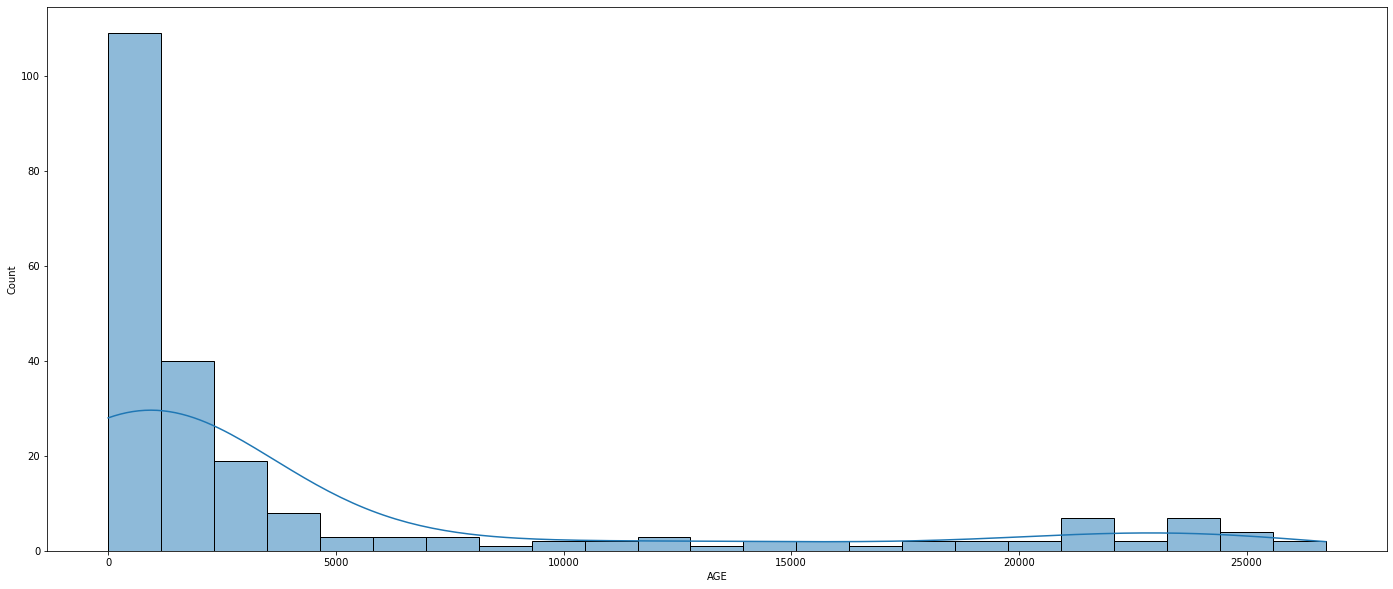

In [35]:
fig, ax = plt.subplots(figsize=(24, 10))
#sns.histplot(data=df['AGE'],ax=ax,kde=True)
sns.histplot(data=df.groupby(['AGE', 'DEATH'])['AGE'].count(),ax=ax,kde=True)
plt.show()

### Conclusion
<ol>
    <li>Maximum age was 121 and minimum was 0 years of age</li>
    <li>Maximum number of people were in age group 20-40</li>
    <li>The oldest person who got the corona lived</li>
    <li>Most death occured in age group 0-3 i.e </li>
</ol>

### Removing values ages greater than 100

In [36]:
filter=df[df['AGE']<=100]
print(filter.shape)
df=filter
df.shape

(1048437, 21)


(1048437, 21)

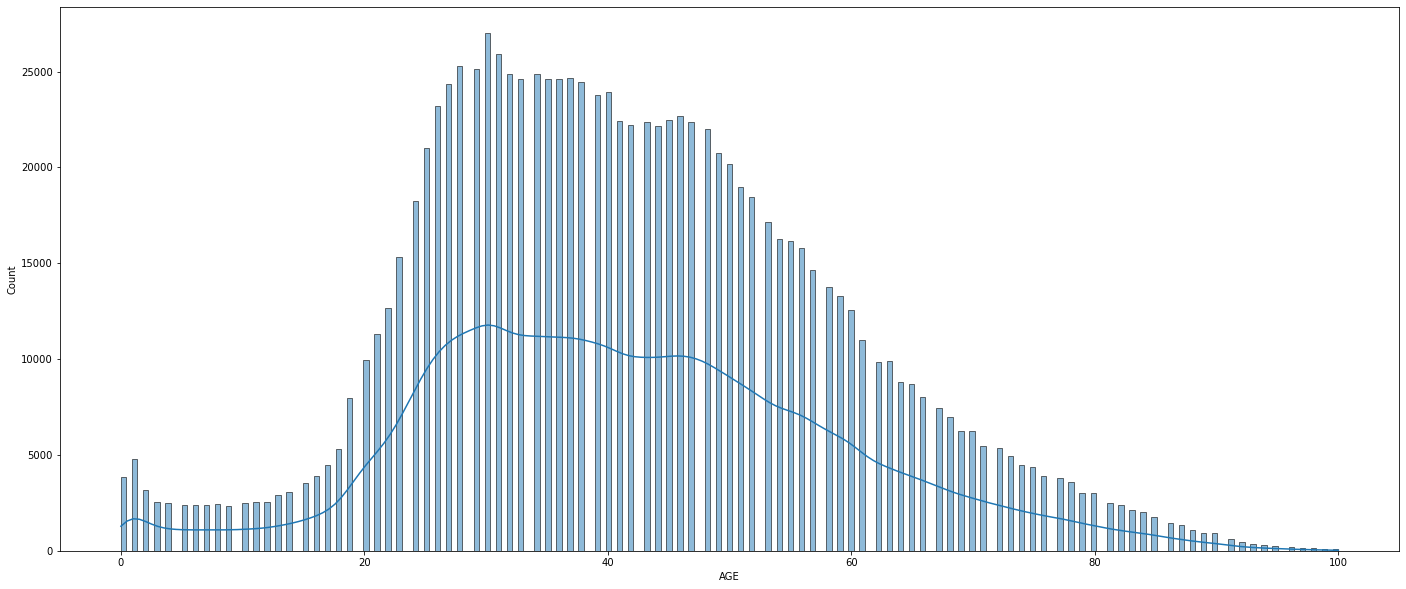

In [37]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.histplot(data=df['AGE'],ax=ax,kde=True)
#sns.histplot(data=df.groupby(['AGE', 'DEATH'])['AGE'].count(),ax=ax,kde=True)
plt.show()

### Pregnant

In [38]:
df['PREGNANT'].value_counts()

97    523442
2     513111
1       8131
98      3753
Name: PREGNANT, dtype: int64

### We assume that there is no male that are pregnant and for values whose 0 is not pregnant and 2 is pregnant


In [39]:
df['PREGNANT']=np.where((df['SEX']==2),0,df['PREGNANT'])
df['PREGNANT']=np.where((df['PREGNANT']==98),0,df['PREGNANT'])
df['PREGNANT']=np.where((df['PREGNANT']==2),0,df['PREGNANT'])


df.groupby(['SEX', 'PREGNANT'])['SEX'].count()

SEX  PREGNANT
1    0           516864
     1             8131
2    0           523442
Name: SEX, dtype: int64

## DIABETES

In [40]:
df['DIABETES'].value_counts()

2     920122
1     124980
98      3335
Name: DIABETES, dtype: int64

In [41]:
df.groupby(['DIABETES','HIPERTENSION'])['DIABETES'].count()

DIABETES  HIPERTENSION
1         1                66000
          2                58878
          98                 102
2         1                96530
          2               823288
          98                 304
98        1                  178
          2                  463
          98                2694
Name: DIABETES, dtype: int64

In [42]:
df['DIABETES']=np.where(((df['HIPERTENSION']==1) & (df['DIABETES']==98)),1,df['DIABETES'])
df['DIABETES']=np.where((df['DIABETES']==2),0,df['DIABETES'])
df['DIABETES']=np.where((df['DIABETES']==98),0,df['DIABETES'])
df['DIABETES'].value_counts()

0    923279
1    125158
Name: DIABETES, dtype: int64

### COPD

In [43]:
df['COPD'].value_counts()

2     1030381
1       15056
98       3000
Name: COPD, dtype: int64

In [44]:
df.groupby(['COPD','ASTHMA'])['COPD'].count()


COPD  ASTHMA
1     1           1215
      2          13811
      98            30
2     1          30327
      2         999827
      98           227
98    1             28
      2            253
      98          2719
Name: COPD, dtype: int64

In [45]:
df['COPD']=np.where(((df['ASTHMA']==1) & (df['COPD']==98)),1,df['COPD'])
df['COPD']=np.where((df['COPD']==2),0,df['COPD'])
df['COPD']=np.where((df['COPD']==98),0,df['COPD'])
df['COPD'].value_counts()

0    1033353
1      15084
Name: COPD, dtype: int64

## ASTHMA

#### since COPD and ASTHMA have very high co-relation i.e 90 so we can have only COPD so, dropping ASTHMA

In [46]:
df.drop('ASTHMA', axis=1,inplace=True)
df.shape

(1048437, 20)

In [47]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

## INMSUPR

#### People who are immunosuppressed have a reduced ability to fight infections and other diseases. This may be caused by certain diseases or conditions, such as AIDS, cancer, diabetes, malnutrition, and certain genetic disorders.

In [48]:
df['INMSUPR'].value_counts()

2     1030871
1       14165
98       3401
Name: INMSUPR, dtype: int64

In [49]:
df.groupby(['INMSUPR','DIABETES'])['INMSUPR'].count()

INMSUPR  DIABETES
1        0            10366
         1             3799
2        0           909808
         1           121063
98       0             3105
         1              296
Name: INMSUPR, dtype: int64

In [50]:
df['INMSUPR']=np.where(((df['DIABETES']==1) & (df['INMSUPR']==98)),1,df['INMSUPR'])
df['INMSUPR']=np.where((df['INMSUPR']==2),0,df['INMSUPR'])
df['INMSUPR']=np.where((df['INMSUPR']==98),0,df['INMSUPR'])
df['INMSUPR'].value_counts()

0    1033976
1      14461
Name: INMSUPR, dtype: int64

### HIPERTENSION

In [51]:
df['HIPERTENSION'].value_counts()

2     882629
1     162708
98      3100
Name: HIPERTENSION, dtype: int64

In [52]:
df['HIPERTENSION']=np.where(((df['OBESITY']==1) & (df['INMSUPR']==98)),1,df['HIPERTENSION'])
df['HIPERTENSION']=np.where((df['HIPERTENSION']==2),0,df['HIPERTENSION'])
df['HIPERTENSION']=np.where((df['HIPERTENSION']==98),0,df['HIPERTENSION'])
df['HIPERTENSION'].value_counts()

0    885729
1    162708
Name: HIPERTENSION, dtype: int64

### OHTER_DISEASE

In [53]:
df['OTHER_DISEASE'].value_counts()

2     1015358
1       28039
98       5040
Name: OTHER_DISEASE, dtype: int64

In [54]:
filter1=df[df['OTHER_DISEASE']!=98]
print(filter1.shape)
df=filter1
df.shape

(1043397, 20)


(1043397, 20)

### CARDIO_VASCULAR

In [55]:
df['CARDIOVASCULAR'].value_counts()

2     1022533
1       20620
98        244
Name: CARDIOVASCULAR, dtype: int64

In [56]:
filter2=df[df['CARDIOVASCULAR']!=98]
print(filter2.shape)
df=filter2
df.shape

(1043153, 20)


(1043153, 20)

### OBESITY

In [57]:
df['OBESITY'].value_counts()

2     883635
1     159104
98       414
Name: OBESITY, dtype: int64

In [58]:
df['OBESITY'].corr(df['DEATH'])

0.012403795355134714

In [59]:
df.drop('OBESITY',axis=1,inplace=True)

/tmp/ipykernel_59532/1785278761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('OBESITY',axis=1,inplace=True)


In [60]:
df.shape

(1043153, 19)

### RENAL_CHRONIC

In [61]:
df['RENAL_CHRONIC'].value_counts()


2     1024187
1       18790
98        176
Name: RENAL_CHRONIC, dtype: int64

In [62]:
df['RENAL_CHRONIC']=np.where(((df['CARDIOVASCULAR']==1) & (df['RENAL_CHRONIC']==98)),1,df['RENAL_CHRONIC'])
df['RENAL_CHRONIC']=np.where((df['RENAL_CHRONIC']==2),0,df['RENAL_CHRONIC'])
df['RENAL_CHRONIC']=np.where((df['RENAL_CHRONIC']==98),0,df['RENAL_CHRONIC'])
df['RENAL_CHRONIC'].value_counts()

/tmp/ipykernel_59532/729613064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RENAL_CHRONIC']=np.where(((df['CARDIOVASCULAR']==1) & (df['RENAL_CHRONIC']==98)),1,df['RENAL_CHRONIC'])
/tmp/ipykernel_59532/729613064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RENAL_CHRONIC']=np.where((df['RENAL_CHRONIC']==2),0,df['RENAL_CHRONIC'])
/tmp/ipykernel_59532/729613064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

0    1024348
1      18805
Name: RENAL_CHRONIC, dtype: int64

### TOBACCO

In [63]:
df['TOBACCO'].value_counts()

2     958706
1      84009
98       438
Name: TOBACCO, dtype: int64

In [64]:
filter3=df[df['CARDIOVASCULAR']!=98]
print(filter3.shape)
df=filter3
df.shape

(1043153, 19)


(1043153, 19)

### CLASIFFICATION_FINAL

In [65]:
df['CLASIFFICATION_FINAL'].value_counts()

7    497186
3    379415
6    127275
5     25874
1      8487
4      3106
2      1810
Name: CLASIFFICATION_FINAL, dtype: int64

### ICU

In [66]:
df['ICU'].value_counts()

97    845357
2     173828
1      16585
99      7383
Name: ICU, dtype: int64

In [67]:
df.groupby(['PATIENT_TYPE','ICU'])['PATIENT_TYPE'].count()

PATIENT_TYPE  ICU
1             97     845357
2             1       16585
              2      173828
              99       7383
Name: PATIENT_TYPE, dtype: int64

In [68]:
df['ICU']=np.where((df['PATIENT_TYPE']==1),0,df['ICU'])
df['ICU']=np.where((df['ICU']==2),0,df['ICU'])
df['ICU']=np.where((df['ICU']==99),0,df['ICU'])
df['ICU'].value_counts()

0    1026568
1      16585
Name: ICU, dtype: int64

### Train test splitting

In [69]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()
rfc = RandomForestClassifier()

models = {'svc': svc, 'knn': knn, 'dtc': dtc, 'nb': nb, 'rfc': rfc}

x = df.drop('DEATH', axis=1)
y = df['DEATH']


In [70]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)

In [71]:
type(x_test)

pandas.core.frame.DataFrame

In [72]:
print(x_test)

        USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  \
713822      2            12    2             1       97          0   32   
848625      1            12    1             1       97          0   28   
947527      2            12    2             1       97          0   41   
406207      2             9    1             1       97          0   43   
522468      2            12    2             1       97          0   33   
...       ...           ...  ...           ...      ...        ...  ...   
254780      2             4    1             1       97          0   14   
174402      1             4    1             1       97          0   30   
49991       1             4    2             2        0          0   92   
344660      1             6    2             2        0          1   74   
871624      2            12    1             1       97          0   40   

        PREGNANT  DIABETES  COPD  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
713822         0         

In [73]:
# model_accuracy = {}
# for model in models.keys():
#     mod = models[model].fit(x_train, y_train)
#     predict = mod.predict(x_test)
#     print(f"{model}")
#     print(confusion_matrix(predict, y_test))
#     if model not in model_accuracy.keys():
#         model_accuracy.update({model: accuracy_score(y_test, predict)})

In [74]:
print(model_accuracy)

NameError: name 'model_accuracy' is not defined

##### SVC has the highest accurarcy so fine tunning svc

In [1]:
import pickle

In [ ]:
# pickle.dump(models, open('model_svc.pkl', 'wb'))

In [75]:
import pickle

In [2]:
m = pickle.load(open('model_svc.pkl', 'rb'))

In [3]:
m

{'svc': SVC(),
 'knn': KNeighborsClassifier(),
 'dtc': DecisionTreeClassifier(),
 'nb': GaussianNB(),
 'rfc': RandomForestClassifier()}

In [4]:
model_svc = m.get('svc')


In [6]:
pickle.dump(model_svc, open('model_svc1.pkl', 'wb'))

In [80]:
n.predict(x_test)